In [58]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [60]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [61]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [62]:
EXPERIMENT_NAME = 'stress_testing_with_cols_imp_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = 'a7330afe-1a66-46fb-a9c8-168e741cf2fa'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [63]:
MODEL_NAMES = ['LogisticRegression']

FEATURE_IMPORTANCE = {
    'Original_Column': ['baseline', 'age', 'juv_other_count', 'priors_count', 'juv_fel_count'],
    'Column_Abs_Imp': [None, 0.40, 0.02, 0.56, 0.00],
    'Column_With_Imp': ['baseline', 'age (-0.40)', 'juv_other_count (0.02)', 'priors_count (0.56)', 'juv_fel_count (0.00)'],
}
feature_imp_df = pd.DataFrame.from_dict(FEATURE_IMPORTANCE)
feature_imp_df.head()

,Original_Column,Column_Abs_Imp,Column_With_Imp
0,baseline,NaN,baseline
1,age,0.40,age (-0.40)
2,juv_other_count,0.02,juv_other_count (0.02)
3,priors_count,0.56,priors_count (0.56)
4,juv_fel_count,0.00,juv_fel_count (0.00)


In [64]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [65]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [66]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(80, 25)

In [67]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.687500,0.699690,0.668293,0.691450,0.680851,0.681499,0.712871
2,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,2,OK,2023-05-03 16:23:28.326,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.672348,0.681115,0.658537,0.669145,0.702128,0.660422,0.722772
3,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,3,OK,2023-05-03 16:23:28.340,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.715909,0.718266,0.712195,0.710037,0.723404,0.709602,0.742574
4,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,4,OK,2023-05-03 16:23:28.351,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
5,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.107135,0.114223,0.095967,0.000000,0.000000,0.102829,0.125339
6,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.068192,0.073554,0.059744,0.000000,0.000000,0.063317,0.088803
7,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,2,OK,2023-05-03 16:23:28.326,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.000000,0.080831,0.000000,0.000000,0.000000,0.000000,0.108594
8,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,3,OK,2023-05-03 16:23:28.340,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.111179,0.121229,0.095344,0.000000,0.000000,0.106889,0.129316
9,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,4,OK,2023-05-03 16:23:28.351,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.107135,0.114223,0.095967,0.000000,0.000000,0.102829,0.125339


In [68]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [69]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [70]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['baseline'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
5,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.107135,0.114223,0.095967,0.000000,0.000000,0.102829,0.125339
10,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.696356,0.742857,0.583333,0.749186,0.518519,0.707547,0.628571
15,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.338462,0.257143,0.505882,0.248366,0.611111,0.318182,0.450000
20,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.231343,0.304054,0.141667,0.336207,0.068966,0.260870,0.131148
25,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.020015,0.021061,0.018368,0.021468,0.016567,0.020520,0.017884
30,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.080471,0.086206,0.071436,0.078232,0.057683,0.077231,0.094169
35,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.886364,0.878019,0.899512,0.889219,0.923404,0.890398,0.869307
40,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.517018,0.487480,0.563558,0.483097,0.572623,0.511872,0.538776
45,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-03 16:23:28.305,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.735043,0.742857,0.711864,0.746753,0.777778,0.735294,0.733333


In [71]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['priors_count'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.687500,0.699690,0.668293,0.691450,0.680851,0.681499,0.712871
6,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.068192,0.073554,0.059744,0.000000,0.000000,0.063317,0.088803
11,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.655532,0.715543,0.507246,0.726073,0.444444,0.671498,0.553846
16,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.396154,0.302857,0.588235,0.281046,0.666667,0.368182,0.550000
21,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.231343,0.297297,0.150000,0.344828,0.103448,0.265700,0.114754
26,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.027269,0.028895,0.024708,0.029430,0.023782,0.027785,0.025091
31,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.050842,0.054902,0.044444,0.044775,0.023168,0.046995,0.067107
36,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.929545,0.924458,0.937561,0.939033,0.970213,0.934895,0.906931
41,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.544491,0.501684,0.611937,0.489246,0.614356,0.534378,0.587243
46,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-03 16:23:28.315,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.716895,0.734940,0.660377,0.733333,0.666667,0.716495,0.720000


## Metrics Visualization and Reporting

In [72]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Specific subgroup metric per dataset and multiple models

In [77]:
visualizer.create_subgroups_grid_pct_lines_plot_for_col_imp(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                            model_name=MODEL_NAMES[0],
                                                            subgroup_metrics=['Jitter', 'Label_Stability', 'F1', 'Accuracy'],
                                                            sort_cols_lst=['baseline', 'juv_fel_count (0.00)',
                                                                           'juv_other_count (0.02)', 'age (-0.40)', 'priors_count (0.56)'],
                                                            feature_imp_df=feature_imp_df)

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and error level

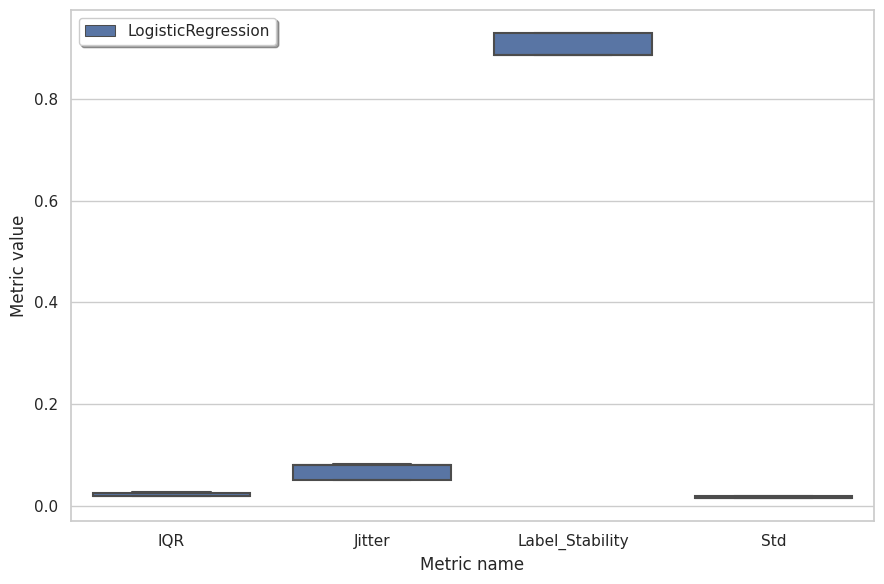

In [74]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance',
                                                                     figsize=(9, 6))

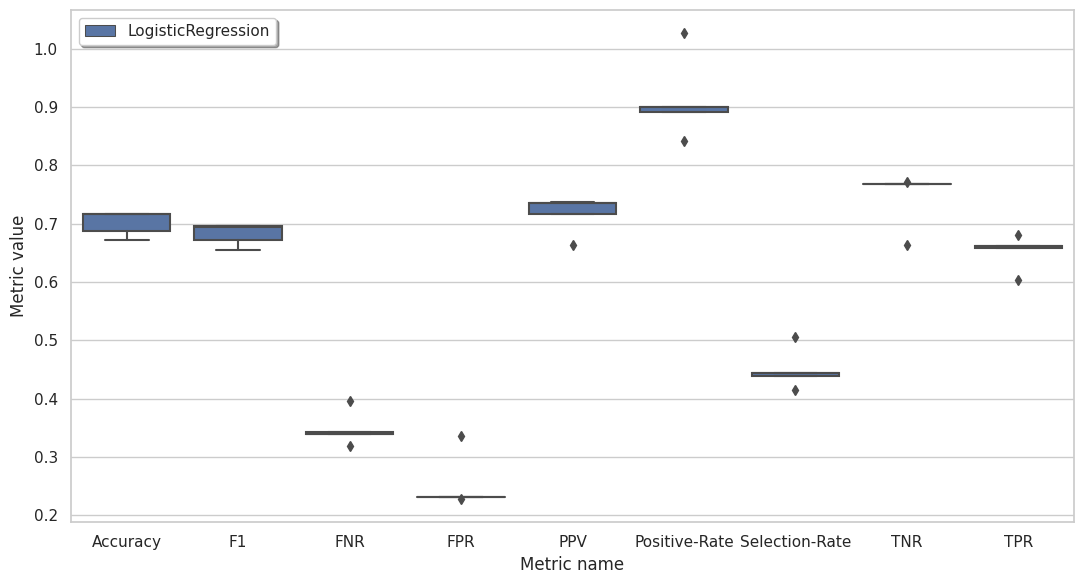

In [75]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error',
                                                                     figsize=(11, 6))

### One box plot for both error and variance metrics for subgroups

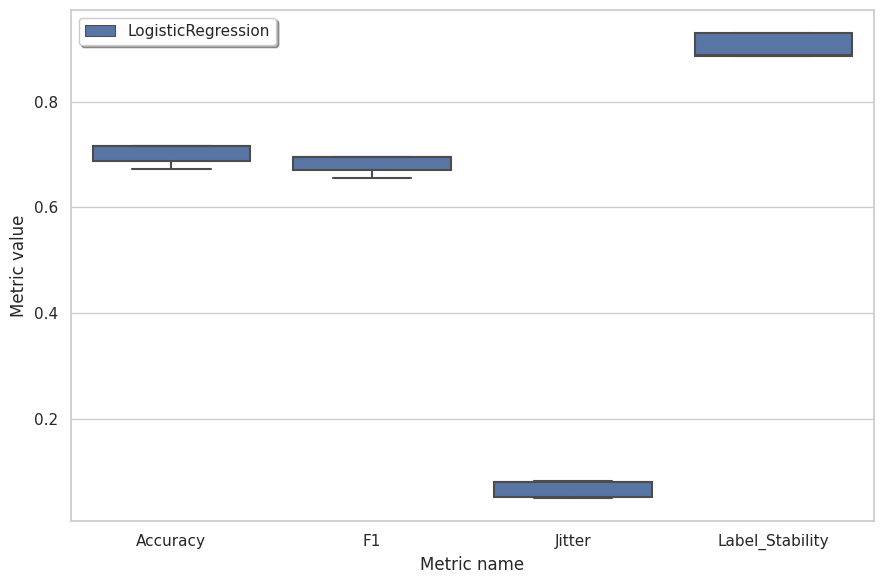

In [76]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'],
                                                                     figsize=(9, 6))